<a href="https://colab.research.google.com/github/VVIX2/VVIX2.github.io/blob/main/2025_02_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression in Python (Google Colab Compatible)

## **1. Introduction to Logistic Regression**

### **What is Logistic Regression?**
Logistic Regression is a classification algorithm used to predict the probability of a categorical dependent variable. Unlike linear regression, which predicts continuous values, logistic regression predicts discrete classes by applying the **sigmoid function** to the linear equation:
$$
P(y=1 | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2)}}
$$
where:
- $β_0$ is the intercept (bias)
- $β_1, β_2$ are the coefficients (weights) for features $X_1, X_2$
- The **sigmoid function** ensures that the output is between 0 and 1, representing a probability.

The goal is to adjust the weights $β_j$ to maximize the likelihood of correctly classifying the data.

## **2. Load and Preprocess the Iris Dataset**


- We load the **Iris dataset** from Scikit-Learn.
- Only the first two features (**sepal length** and **sepal width**) are selected to simplify visualization.
- The target variable is converted to **binary classification**, where **Setosa (0) vs Non-Setosa (1)**.

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only first two features for visualization purposes
y = (iris.target != 0).astype(int)  # Convert to binary classification (Setosa vs Non-Setosa)

## **3. Explore the Dataset**

- We convert the dataset into a Pandas **DataFrame** for easier exploration.
- The dataset **description (DESCR)** provides insights about the features.
- The **class distribution** of target labels is displayed to understand the dataset balance.

In [ ]:
# Convert to DataFrame for exploration
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Display first few rows
print(iris_df.head())

# Display dataset description
print(iris.DESCR)

# Check class distribution
y_unique, y_counts = np.unique(iris.target, return_counts=True)
print(f"Class Distribution: {dict(zip(y_unique, y_counts))}")

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Stat

## **4. Split Data into Training and Testing Sets**

- The dataset is split into **80% training** and **20% testing**.
- Features are **standardized** to have a mean of 0 and variance of 1, which improves gradient descent convergence.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **5. Train Logistic Regression Using Gradient Descent**

- The **sigmoid function** converts linear outputs into probabilities.
- **Gradient Descent** is used to update model parameters **θ** iteratively to minimize the **log loss function**.
- The **cost function (log loss)** is recorded at each epoch to monitor training.

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent_logistic(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.random.randn(n + 1, 1)  # Initialize weights randomly
    X_b = np.c_[np.ones((m, 1)), X]  # Add intercept term
    cost_history = []

    for epoch in range(epochs):
        predictions = sigmoid(X_b @ theta)
        gradients = (1/m) * X_b.T @ (predictions - y.reshape(-1, 1))
        theta -= learning_rate * gradients

        # Compute and store cost function value for monitoring
        cost = -np.mean(y.reshape(-1, 1) * np.log(predictions) + (1 - y.reshape(-1, 1)) * np.log(1 - predictions))
        cost_history.append(cost)

    return theta, cost_history

# Run Gradient Descent
theta_gd, cost_history = gradient_descent_logistic(X_train, y_train, learning_rate=0.01, epochs=1000)

## **6. Train Logistic Regression Using Scikit-Learn**

- The **Scikit-Learn LogisticRegression** model is trained using the training dataset.
- Predictions are made on the test set.

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)

## **7. Compare Model Performance (Accuracy & Confusion Matrix)**

- **Accuracy, Confusion Matrix, and Classification Report** are computed for both models.
- Gradient Descent predictions are thresholded at **0.5** to classify as 0 or 1.

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_true, y_pred)}")

# Predictions using Gradient Descent
y_pred_gd = (sigmoid(np.c_[np.ones((X_test.shape[0], 1)), X_test] @ theta_gd) >= 0.5).astype(int)

evaluate_model(y_test, y_pred_sklearn, "Scikit-learn Logistic Regression")
evaluate_model(y_test, y_pred_gd, "Gradient Descent Logistic Regression")

Scikit-learn Logistic Regression Accuracy: 1.0000
Confusion Matrix:
[[10  0]
 [ 0 20]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Gradient Descent Logistic Regression Accuracy: 1.0000
Confusion Matrix:
[[10  0]
 [ 0 20]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## **8. Visualize Decision Boundary**

- A **scatter plot** shows the training data.
- The **decision boundary** is drawn using the trained weights.
- The boundary represents where the model predicts **Class 0 vs Class 1**.

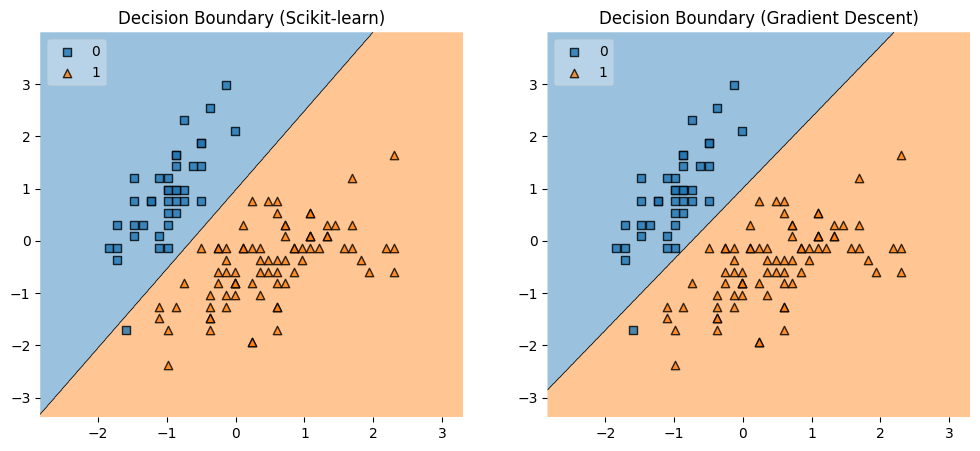

In [ ]:
from mlxtend.plotting import plot_decision_regions

class GDLogisticRegression:
    def __init__(self, theta):
        self.theta = theta

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add intercept term
        return (sigmoid(X_b @ self.theta) >= 0.5).astype(int).flatten()


plt.figure(figsize=(12, 5))

# Scikit-learn Logistic Regression
plt.subplot(1, 2, 1)
plot_decision_regions(X_train, y_train, clf=model, legend=2)
plt.title("Decision Boundary (Scikit-learn)")

# Gradient Descent Logistic Regression
plt.subplot(1, 2, 2)
gd_clf = GDLogisticRegression(theta_gd)  # Custom classifier
plot_decision_regions(X_train, y_train, clf=gd_clf, legend=2)
plt.title("Decision Boundary (Gradient Descent)")

plt.show()


## **9. Try Logistic Regression on Another Dataset**

Using the **Breast Cancer dataset**, try to implement a **Logistic Regression model** using both **Scikit-Learn and Gradient Descent**, following the same steps as we did for the Iris dataset.

In [ ]:
# Load a different dataset (Breast Cancer dataset)
cancer = datasets.load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target